In [1]:
import glob
import librosa
import os
import re
import gc
import librosa.display as display
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

WAV_STORE_PATH = r"D:\Documents\datasets\AIST4010\muse\wavs"
SPEC_STORE_PATH = r"D:\Documents\datasets\AIST4010\muse\spectrograms"
SONGS_PATH = r"D:\Documents\datasets\AIST4010\muse\songs"

songs_fp = glob.glob(os.path.join(SONGS_PATH, '*'))
songs_id = [re.match(r"^.*\\([^\.\\]*)\.mp3$", fp).group(1) for fp in songs_fp]
wav_stores_fp = [os.path.join(WAV_STORE_PATH, song_id+'.npy') for song_id in songs_id]
spec_stores_fp = [os.path.join(SPEC_STORE_PATH, song_id+'.png') for song_id in songs_id]

10000  / 10000  done
5
Flushing output cache (0 entries)


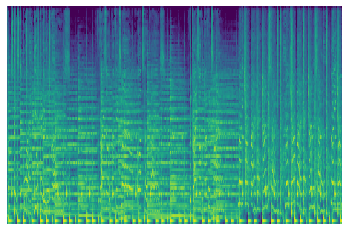

In [4]:
# for plotting and saving the images
fig, ax = plt.subplots()
ax.axis('off')

# for tracking the conversion progress
CONVERT_SIZE = 50  # report every time 100 clips are converted
tem_loads, tem_specs = None, None
ttl_imgs = min(10000, len(songs_fp))  # only convert up to 10000 audios to avoid the large file size of npy files


# converting
gc.enable()
for base in range(9850, ttl_imgs, CONVERT_SIZE):
    convert_size = min(ttl_imgs, base+CONVERT_SIZE)
    fps, ids = songs_fp[base: convert_size], songs_id[base: convert_size]
    wav_stores, spec_stores = wav_stores_fp[base: convert_size], spec_stores_fp[base: convert_size]
    tem_loads = [librosa.load(fp, duration=30, mono=True) for fp in fps]
    tem_specs = [librosa.power_to_db(librosa.feature.melspectrogram(y=tem_load[0], sr=tem_load[1]), ref=np.max) for tem_load in tem_loads]
    
    for idx in range(convert_size - base):
        np.save(wav_stores[idx], tem_loads[idx][0])
        display.specshow(tem_specs[idx], ax=ax, cmap='viridis')
        fig.savefig(spec_stores[idx], bbox_inches='tight', pad_inches=0)
    
    clear_output(wait=True)
    print(f"{convert_size:<6} / {ttl_imgs:<6} done")
    print(gc.collect())
    %reset -f out

In [42]:
idx, len(wav_stores)

(50, 50)

In [6]:
import pandas as pd

df = pd.read_csv(r"D:\Documents\datasets\AIST4010\muse\valid_data.csv")
df.set_index("spotify_id", inplace=True)
extracted_data = df.loc[songs_id[:10000]]
extracted_data.to_csv(r"D:\Documents\datasets\AIST4010\muse\extracted_data.csv")